In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df = pd.read_csv('covid_19_indonesia_time_series_all.csv')
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         31822 non-null  datetime64[ns]
 1   Location ISO Code            31822 non-null  object        
 2   Location                     31822 non-null  object        
 3   New Cases                    31822 non-null  int64         
 4   New Deaths                   31822 non-null  int64         
 5   New Recovered                31822 non-null  int64         
 6   New Active Cases             31822 non-null  int64         
 7   Total Cases                  31822 non-null  int64         
 8   Total Deaths                 31822 non-null  int64         
 9   Total Recovered              31822 non-null  int64         
 10  Total Active Cases           31822 non-null  int64         
 11  Location Level               31822 non-nu

In [4]:
df['Month-Year'] = df['Date'].dt.to_period('M')
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths,Month-Year
0,2020-03-01,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN,2020-03
1,2020-03-02,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0,2020-03
2,2020-03-02,IDN,Indonesia,2,0,0,2,2,0,0,...,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN,2020-03
3,2020-03-02,ID-RI,Riau,1,0,0,1,1,0,1,...,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN,2020-03
4,2020-03-03,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0,2020-03


In [5]:
grouped = df.groupby('Month-Year')[['Total Deaths',
                                    'Total Recovered',
                                    'Total Active Cases']].mean().reset_index()
grouped

,Month-Year,Total Deaths,Total Recovered,Total Active Cases
0,2020-03,1.0,3.0,-1.0
1,2020-04,3.0,6.0,14.0
2,2020-05,6.0,51.0,99.0
3,2020-06,11.0,182.5,135.5
4,2020-07,20.0,419.0,238.0
5,2020-08,36.0,1048.0,467.0
6,2020-09,71.0,1802.0,710.0
7,2020-10,123.0,3143.0,726.0
8,2020-11,170.5,4494.5,780.5
9,2020-12,238.0,5833.0,1257.0


In [6]:
grouped['Month-Year'] = grouped['Month-Year'].astype('str')

In [10]:
grouped_two = df.groupby('Month-Year')[['Total Cases per Million',
                                    'Total Deaths per Million'
                                       ]].median().reset_index()
grouped_two

,Month-Year,Total Cases per Million,Total Deaths per Million
0,2020-03,0.560,0.230
1,2020-04,7.580,0.720
2,2020-05,48.310,1.610
3,2020-06,122.825,3.680
4,2020-07,221.790,6.500
5,2020-08,428.110,10.450
6,2020-09,700.605,19.650
7,2020-10,1208.830,32.790
8,2020-11,1575.435,49.860
9,2020-12,2202.140,61.210


In [11]:
grouped_two['Month-Year'] = grouped_two['Month-Year'].astype('str')

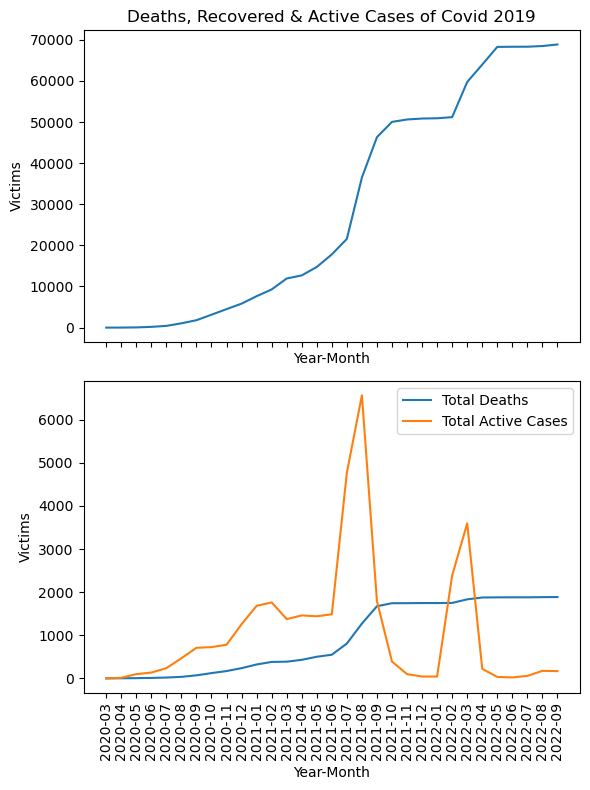

In [7]:
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows= 2, figsize=(6,8), sharex=True)
ax1.plot(grouped['Month-Year'], grouped['Total Recovered'],
         label='Total Recovered')
ax1.set_title("Deaths, Recovered & Active Cases of Covid 2019")
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Victims')
ax1.tick_params(axis= 'x', rotation=90)

ax2.plot(grouped['Month-Year'], grouped['Total Deaths'],
         label='Total Deaths')
ax2.plot(grouped['Month-Year'], grouped['Total Active Cases'], 
         label='Total Active Cases')
# ax2.set_title("Deaths, Recovered & Active Cases of Covid 2019")
ax2.set_xlabel('Year-Month')
ax2.set_ylabel('Victims')
ax2.tick_params(axis='x', rotation=90)
plt.legend()
# plt.grid()
plt.savefig('contoh.png')
plt.tight_layout()
plt.show()

In [ ]:
# df.groupby('Month-Year')[['Total Cases per Million',
#                                     'Total Deaths per Million'
#                                        ]].median().reset_index()

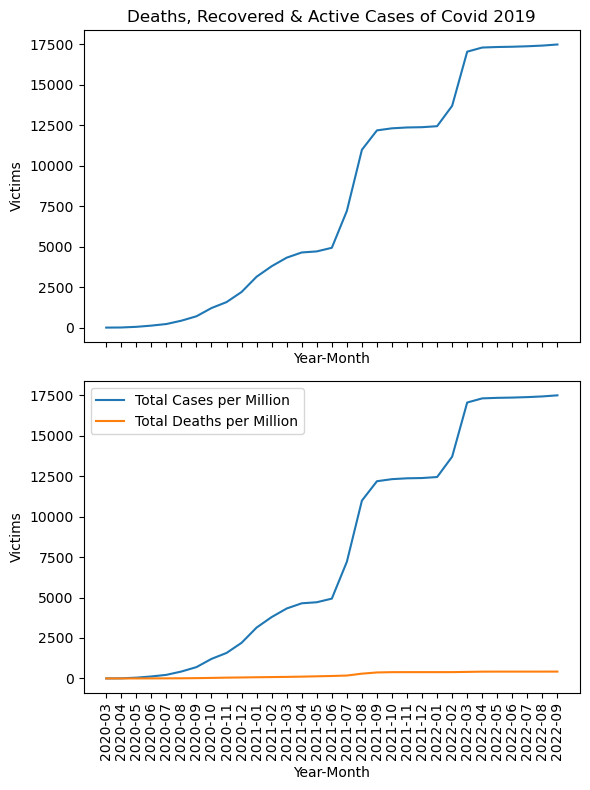

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows= 2, figsize=(6,8), sharex=True)
ax1.plot(grouped_two['Month-Year'], grouped_two['Total Cases per Million'],
         label='Total Cases per Million')
ax1.set_title("Deaths, Recovered & Active Cases of Covid 2019")
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Victims')
ax1.tick_params(axis= 'x', rotation=90)

ax2.plot(grouped_two['Month-Year'], grouped_two['Total Cases per Million'],
         label='Total Cases per Million')
ax2.plot(grouped_two['Month-Year'], grouped_two['Total Deaths per Million'], 
         label='Total Deaths per Million')
# ax2.set_title("Deaths, Recovered & Active Cases of Covid 2019")
ax2.set_xlabel('Year-Month')
ax2.set_ylabel('Victims')
ax2.tick_params(axis='x', rotation=90)
plt.legend()
# plt.grid()
#plt.savefig('contoh.png')
plt.tight_layout()
plt.show()